<a href="https://colab.research.google.com/github/Rahulkumaw89/AI-ML/blob/main/day9_of_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [38]:
dataset_train = pd.read_csv('/content/Ethereum.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [40]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [43]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [44]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [45]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [46]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [47]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [48]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [49]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [57]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 8s 218ms/step - loss: 9.0725e-04
Epoch 2/10
38/38 [==============================] - 10s 276ms/step - loss: 8.5173e-04
Epoch 3/10
38/38 [==============================] - 10s 272ms/step - loss: 6.8893e-04
Epoch 4/10
38/38 [==============================] - 8s 212ms/step - loss: 8.3780e-04
Epoch 5/10
38/38 [==============================] - 7s 185ms/step - loss: 7.5527e-04
Epoch 6/10
38/38 [==============================] - 10s 272ms/step - loss: 7.0926e-04
Epoch 7/10
38/38 [==============================] - 8s 205ms/step - loss: 7.2211e-04
Epoch 8/10
38/38 [==============================] - 8s 213ms/step - loss: 7.1835e-04
Epoch 9/10
38/38 [==============================] - 9s 240ms/step - loss: 5.8044e-04
Epoch 10/10
38/38 [==============================] - 10s 270ms/step - loss: 6.3907e-04


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [58]:
dataset_test = pd.read_csv('/content/kp.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [59]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

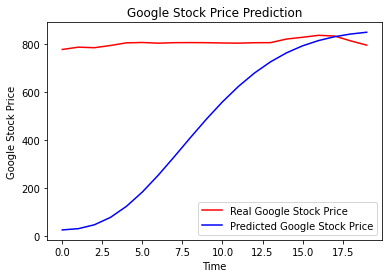

In [60]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()